In [1]:
from prac_code.value import Value
from prac_code.plotter import Plotter
from prac_code.tables import start

In [2]:
import pandas as pd
import numpy as np

Упражнение 2

In [3]:
R3 = 2.0e3
R3 = Value(values=[R3], syst=R3 * 0.05)
t1 = Value(values=[0.2152], syst=0.0049) / 1000
t2 = Value(values=[1.1070], syst=0.0080) / 1000
t3 = Value(values=[1.8770], syst=0.014) / 1000
C1 = t1 / R3
C2 = t2 / R3
C3 = t3 / R3
print("C1 = {} C2 = {} C3 = {}".format(C1, C2, C3))

C1 = 1.08e-7 ± 6e-9 C2 = 5.5e-7 ± 3e-8 C3 = 9.4e-7 ± 5e-8


Упражнение 3

In [4]:
t1 = Value(values=[0.3770], syst=0.0059) / 1000
t2 = Value(values=[2.053], syst=0.0101) / 1000
t3 = Value(values=[3.6683], syst=0.0134) / 1000
R41 = t1 / C1
R42 = t2 / C2
R43 = t3 / C3
print("R4 = {} | {} | {}".format(R41, R42, R43))
t4 = Value(values=[0.2036], syst=0.0037) / 1000
t5 = Value(values=[10.0098], syst=0.0352) / 1000
R2 = t4 / C3
R5 = t5 / C3
print("R2 = {} R5 = {}".format(R2, R5))

R4 = 3.5e+3 ± 2e+2 | 3.71e+3 ± 1.9e+2 | 3.91e+3 ± 2.0e+2
R2 = 217 ± 12 R5 = 1.07e+4 ± 5e+2


Упражнение 4

In [5]:
t1 = Value(values=[3.0234], syst=0.0284) / 1000
t2 = Value(values=[1.6524], syst=0.0123) / 1000
t3 = Value(values=[0.1673], syst=0.0053) / 1000
R1 = 120
R1 = Value(values=[R1], syst=R1 * 0.05)
L1 = t1 * R1
L2 = t2 * R2
L3 = t3 * R3
print("L = {} | {} | {}".format(L1, L2, L3))

L = 0.363 ± 0.018 | 0.358 ± 0.019 | 0.335 ± 0.020


Упражнение 5

In [ ]:
start()

In [48]:
tab1 = pd.read_csv("tables/1.tab", sep="\t")
tab1

,t1,t2,U1,U2,U3,mU
0,2.11,0.96,4.00,3.56,3.11,5
1,4.42,1.73,9.32,8.42,7.76,5
2,5.84,2.18,9.33,8.39,7.33,5


In [49]:
tab1["T"] = (tab1["t1"] - tab1["t2"]).apply(Value) + Value(values=[0.0], syst=0.05)
tab1["U1"] = tab1["U1"].apply(Value) + Value(values=[0.0], syst=0.05)
tab1["U2"] = tab1["U2"].apply(Value) + Value(values=[0.0], syst=0.05)
tab1["U3"] = tab1["U3"].apply(Value) + Value(values=[0.0], syst=0.05)
from sympy import log
tab1["theta"] = ((tab1["U1"] / tab1["U2"]).apply(lambda v: v.use_func(log)) + (tab1["U1"] / tab1["U2"]).apply(lambda v: v.use_func(log))) / 2.0
from math import pi
tab1["Q"] = pi / tab1["theta"]
tab1

,t1,t2,U1,U2,U3,mU,T,theta,Q
0,2.11,0.96,4.00 ± 0.05,3.56 ± 0.05,3.11 ± 0.05,5,1.15 ± 0.05,0.117 ± 0.019,27 ± 4
1,4.42,1.73,9.32 ± 0.05,8.42 ± 0.05,7.76 ± 0.05,5,2.69 ± 0.05,0.102 ± 0.008,31 ± 2
2,5.84,2.18,9.33 ± 0.05,8.39 ± 0.05,7.33 ± 0.05,5,3.66 ± 0.05,0.106 ± 0.008,30 ± 2


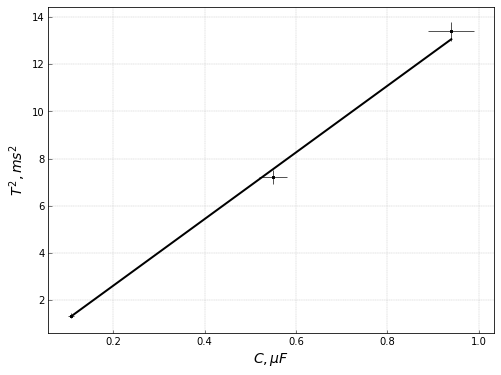

In [40]:
fit, *_ = Plotter(draw_legend=False).set_name("309_1").set_title("").set_y_name("$T^2, ms^2$").set_x_name(
        "$C, \mu F$"). \
        add_line(Plotter.get_new_line(y_value=(tab1["T"]) ** 2, x_value=np.array([C1, C2, C3]) * 10 ** 6,
                                      draw_error=True, legend='$P_1$', fit=True, color='black', marker="s")).\
        plot(show=True, save=True)

In [44]:
a = Value(values=[fit.a], syst=fit.sigma_a)
print("L = {}".format(a / (4 * pi ** 2)))

L = 0.358 ± 0.016


Удивительное совпадение!

In [45]:
start()

In [60]:
tab2 = pd.read_csv("tables/2.tab", sep="\t")
tab2["T"] = (tab2["t1"] - tab2["t2"]).apply(Value) + Value(values=[0.0], syst=0.05)
tab2["U1"] = tab2["U1"].apply(Value) + Value(values=[0.0], syst=0.05)
tab2["U2"] = tab2["U2"].apply(Value) + Value(values=[0.0], syst=0.05)
tab2["U3"] = tab2["U3"].apply(Value) + Value(values=[0.0], syst=0.05)
tab2["theta"] = ((tab2["U1"] / tab2["U2"]).apply(lambda v: v.use_func(log)) + (tab2["U1"] / tab2["U2"]).apply(lambda v: v.use_func(log))) / 2.0
tab2["Q"] = pi / tab2["theta"]
tab2

,t1,t2,U1,U2,U3,mU,T,theta,Q
0,2.04,0.92,8.81 ± 0.05,7.69 ± 0.05,6.85 ± 0.05,5,1.12 ± 0.05,0.136 ± 0.009,23.1 ± 1.5
1,4.34,1.65,8.41 ± 0.05,6.65 ± 0.05,5.69 ± 0.05,5,2.69 ± 0.05,0.235 ± 0.010,13.4 ± 0.5
2,5.69,2.04,8.08 ± 0.05,6.14 ± 0.05,5.39 ± 0.05,5,3.65 ± 0.05,0.275 ± 0.010,11.4 ± 0.4


In [50]:
tab3 = pd.read_csv("tables/3.tab", sep="\t")
tab3["T"] = (tab3["t1"] - tab3["t2"]).apply(Value) + Value(values=[0.0], syst=0.05)
tab3["U1"] = tab3["U1"].apply(Value) + Value(values=[0.0], syst=0.05)
tab3["U2"] = tab3["U2"].apply(Value) + Value(values=[0.0], syst=0.05)
tab3["U3"] = tab3["U3"].apply(Value) + Value(values=[0.0], syst=0.05)
tab3["theta"] = ((tab3["U1"] / tab3["U2"]).apply(lambda v: v.use_func(log)) + (tab3["U1"] / tab3["U2"]).apply(lambda v: v.use_func(log))) / 2.0
tab3["Q"] = pi / tab3["theta"]
tab3

,t1,t2,U1,U2,U3,mU,T,theta,Q
0,2.08,0.92,8.52 ± 0.05,7.09 ± 0.05,6.25 ± 0.05,5,1.16 ± 0.05,0.184 ± 0.009,17.1 ± 0.9
1,4.34,1.61,7.89 ± 0.05,5.88 ± 0.05,5.26 ± 0.05,5,2.73 ± 0.05,0.294 ± 0.011,10.7 ± 0.4
2,5.57,1.96,7.50 ± 0.05,5.52 ± 0.05,5.04 ± 0.05,5,3.61 ± 0.05,0.307 ± 0.011,10.2 ± 0.4


In [67]:
tab2["T_theory"] = pd.Series(2 * pi * np.array([C1, C2, C3]) ** 0.5 * L1 ** 0.5 * 1000)
tab2["theta_theory"] = pd.Series(np.array([1, 1, 1]) / L1) * tab2["T_theory"] * R1 / 2000 
tab2["Q_theory"] = pi / tab2["theta_theory"]
tab2

,t1,t2,U1,U2,U3,mU,T,theta,Q,Q_theory,theta_theory,T_theory
0,2.04,0.92,8.81 ± 0.05,7.69 ± 0.05,6.85 ± 0.05,5,1.12 ± 0.05,0.136 ± 0.009,23.1 ± 1.5,15.3 ± 0.6,0.205 ± 0.008,1.24 ± 0.05
1,4.34,1.65,8.41 ± 0.05,6.65 ± 0.05,5.69 ± 0.05,5,2.69 ± 0.05,0.235 ± 0.010,13.4 ± 0.5,6.7 ± 0.2,0.466 ± 0.017,2.82 ± 0.10
2,5.69,2.04,8.08 ± 0.05,6.14 ± 0.05,5.39 ± 0.05,5,3.65 ± 0.05,0.275 ± 0.010,11.4 ± 0.4,5.18 ± 0.19,0.61 ± 0.02,3.67 ± 0.13


In [68]:
tab3["T_theory"] = pd.Series(2 * pi * np.array([C1, C2, C3]) ** 0.5 * L1 ** 0.5 * 1000)
tab3["theta_theory"] = pd.Series(np.array([1, 1, 1]) / L1) * tab3["T_theory"] * R2 / 2000 
tab3["Q_theory"] = pi / tab3["theta_theory"]
tab3

,t1,t2,U1,U2,U3,mU,T,theta,Q,Q_theory,theta_theory,T_theory
0,2.08,0.92,8.52 ± 0.05,7.09 ± 0.05,6.25 ± 0.05,5,1.16 ± 0.05,0.184 ± 0.009,17.1 ± 0.9,8.5 ± 0.4,0.371 ± 0.016,1.24 ± 0.05
1,4.34,1.61,7.89 ± 0.05,5.88 ± 0.05,5.26 ± 0.05,5,2.73 ± 0.05,0.294 ± 0.011,10.7 ± 0.4,3.73 ± 0.15,0.84 ± 0.03,2.82 ± 0.10
2,5.57,1.96,7.50 ± 0.05,5.52 ± 0.05,5.04 ± 0.05,5,3.61 ± 0.05,0.307 ± 0.011,10.2 ± 0.4,2.87 ± 0.12,1.10 ± 0.04,3.67 ± 0.13


In [73]:
print(tab1.to_csv())

,t1,t2,U1,U2,U3,mU,T,theta,Q
0,2.11,0.96,4.00 ± 0.05,3.56 ± 0.05,3.11 ± 0.05,5,1.15 ± 0.05,0.117 ± 0.019,27 ± 4
1,4.42,1.73,9.32 ± 0.05,8.42 ± 0.05,7.76 ± 0.05,5,2.69 ± 0.05,0.102 ± 0.008,31 ± 2
2,5.84,2.18,9.33 ± 0.05,8.39 ± 0.05,7.33 ± 0.05,5,3.66 ± 0.05,0.106 ± 0.008,30 ± 2



In [74]:
print(tab2.to_csv())

,t1,t2,U1,U2,U3,mU,T,theta,Q,Q_theory,theta_theory,T_theory
0,2.04,0.92,8.81 ± 0.05,7.69 ± 0.05,6.85 ± 0.05,5,1.12 ± 0.05,0.136 ± 0.009,23.1 ± 1.5,15.3 ± 0.6,0.205 ± 0.008,1.24 ± 0.05
1,4.34,1.65,8.41 ± 0.05,6.65 ± 0.05,5.69 ± 0.05,5,2.69 ± 0.05,0.235 ± 0.010,13.4 ± 0.5,6.7 ± 0.2,0.466 ± 0.017,2.82 ± 0.10
2,5.69,2.04,8.08 ± 0.05,6.14 ± 0.05,5.39 ± 0.05,5,3.65 ± 0.05,0.275 ± 0.010,11.4 ± 0.4,5.18 ± 0.19,0.61 ± 0.02,3.67 ± 0.13



In [75]:
print(tab3.to_csv())

,t1,t2,U1,U2,U3,mU,T,theta,Q,Q_theory,theta_theory,T_theory
0,2.08,0.92,8.52 ± 0.05,7.09 ± 0.05,6.25 ± 0.05,5,1.16 ± 0.05,0.184 ± 0.009,17.1 ± 0.9,8.5 ± 0.4,0.371 ± 0.016,1.24 ± 0.05
1,4.34,1.61,7.89 ± 0.05,5.88 ± 0.05,5.26 ± 0.05,5,2.73 ± 0.05,0.294 ± 0.011,10.7 ± 0.4,3.73 ± 0.15,0.84 ± 0.03,2.82 ± 0.10
2,5.57,1.96,7.50 ± 0.05,5.52 ± 0.05,5.04 ± 0.05,5,3.61 ± 0.05,0.307 ± 0.011,10.2 ± 0.4,2.87 ± 0.12,1.10 ± 0.04,3.67 ± 0.13

